In [1]:
import pandas as pd
import geopandas as gpd
import glob
import matplotlib.pyplot as plt

In [2]:
csv_files=glob.glob('data/AQMS'+'/*.csv')
df=pd.concat((pd.read_csv(f) for f in csv_files))

In [3]:
df.head()

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT2,PM2.5,01/01/2019 00:00,13.0,ug/m3,R
1,CT2,PM2.5,01/01/2019 01:00,12.0,ug/m3,R
2,CT2,PM2.5,01/01/2019 02:00,8.0,ug/m3,R
3,CT2,PM2.5,01/01/2019 03:00,6.0,ug/m3,R
4,CT2,PM2.5,01/01/2019 04:00,5.0,ug/m3,R


In [4]:
df.drop(['Species','Units','Provisional or Ratified'],axis=1,inplace=True)

In [5]:
df.groupby('Site').describe()

Value                                                       
       count       mean        std  min  25%   50%   75%        max
Site                                                               
BL0   8558.0  10.750888  10.112520 -3.3  4.7   7.6  12.7   92.40000
BQ9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
BT4      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
BX9   7169.0  11.813182  10.972091 -3.8  5.3   7.9  13.8   88.10000
BY7      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
CD1   8544.0  11.132924  10.262592 -2.8  4.9   7.8  13.4   88.30000
CD9   8730.0  13.642887  10.411786 -7.3  7.2  10.9  16.3   83.90000
CE2      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
CR8   8711.0  10.115831   9.176507 -3.0  5.0   7.0  12.0   84.00000
CT2   8437.0  13.957568  10.865349 -3.0  8.0  11.0  16.0  441.00000
CT3   7575.0  11.669967  10.486332 -3.0  6.0   9.0  15.0  251.00000
GB0   8637.0  12.176705   9.036808 -1.2  6.7   9.4  14.1   79.80000
GN0   3193.0  11.319449   9.740894 -7.2  4.9   8.3  14.9   65.10000
GN3   8342.0  13.411832  11.277777 -3.5  6.8   9.6  15.5  109.40000
GN6   8252.0  10.966893   9.999743 -4.2  5.1   7.7  12.5   84.10000
GR4   8516.0  10.863269   9.913018 -2.7  5.2   8.0  12.5   97.60000
GR8      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
GR9   8713.0  10.425215  10.639660 -4.3  4.0   6.9  12.6   84.50000
HG1      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
HP1   8756.0   9.933029   9.987813  0.4  4.2   6.5  11.3   90.90000
HR1      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
HV1   8403.0  11.004820  12.916148 -9.0  4.5   7.8  13.5  472.20001
KC1   8723.0   9.579548   9.470490  0.4  4.2   6.3  11.0  121.00000
KF1   8723.0   9.578723   9.470523  0.4  4.1   6.4  11.0  121.00000
LH0   8510.0   9.538249   9.165456  0.4  4.1   6.3  11.2   91.00000
LW2   7742.0  14.953500  11.325410 -6.2  8.0  11.6  17.9   92.60000
LW5    411.0   8.671533   7.945340 -4.0  3.0   7.0  13.0   40.00000
MY7   7948.0  14.347974  10.963840 -3.3  7.5  11.4  17.5   93.00000
NM2      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
NM3      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
RB7   3399.0  11.471315  10.159918 -4.0  6.0   9.0  15.0  272.00000
RD0   3249.0   8.211480   8.305129 -5.0  3.0   6.0  11.0   80.00000
SK6      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SK8      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SK9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKA      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKB      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
SKC      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
ST5   8648.0  11.718316  10.163471 -7.0  6.0   9.0  14.0   99.00000
TD5   8148.0  11.784892  14.797966  0.0  5.8   8.6  13.4  592.79999
TH4   6478.0  13.380195  11.332006 -5.3  6.5   9.7  16.1  152.30000
TK3   7940.0  11.548237  11.593650 -2.0  5.0   8.0  14.0  111.00000
TK9      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
TL6      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN
WM0   2215.0  11.681716   9.942168  0.0  7.0   9.0  14.0  339.00000
WMD      0.0        NaN        NaN  NaN  NaN   NaN   NaN        NaN

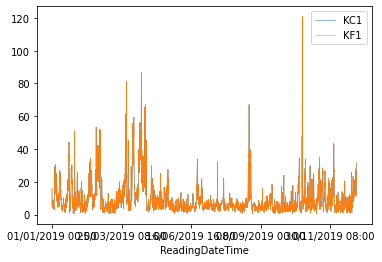

In [6]:
# KF1 and KC1 are very similar
fig,ax=plt.subplots()
df[df['Site']=='KC1'].plot(x='ReadingDateTime',y='Value',ax=ax,label='KC1',linewidth=0.5)
df[df['Site']=='KF1'].plot(x='ReadingDateTime',y='Value',ax=ax,label='KF1',linewidth=0.5)
plt.show()

In [7]:
# Remove KF1
df=df[df['Site']!='KF1']

In [8]:
# list of site codes with PM data
valid_AQMS=df.dropna()['Site'].unique().tolist()
print(valid_AQMS)

['CT2', 'CT3', 'CR8', 'GN0', 'GR4', 'GB0', 'GN6', 'GN3', 'GR9', 'HV1', 'LH0', 'KC1', 'LW5', 'HP1', 'LW2', 'TD5', 'RD0', 'RB7', 'ST5', 'TK3', 'TH4', 'WM0', 'MY7', 'BX9', 'BL0', 'CD9', 'CD1']


In [9]:
# filter sites with no measure in PM2.5
df['valid']=df['Site'].isin(valid_AQMS)
clean_df=df[df['valid']]
clean_df=clean_df.drop('valid',axis=1)
clean_df=clean_df.reset_index(drop=True)
clean_df

,Site,ReadingDateTime,Value
0,CT2,01/01/2019 00:00,13.0
1,CT2,01/01/2019 01:00,12.0
2,CT2,01/01/2019 02:00,8.0
3,CT2,01/01/2019 03:00,6.0
4,CT2,01/01/2019 04:00,5.0
...,...,...,...
236515,CD1,31/12/2019 19:00,22.4
236516,CD1,31/12/2019 20:00,23.8
236517,CD1,31/12/2019 21:00,21.8
236518,CD1,31/12/2019 22:00,23.1


In [10]:
# read in AQMS geometry
gdf=gpd.read_file('data/AQMS/AQMS.gpkg')
gdf

C:\Users\Yulun\anaconda3\envs\sds2021\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,classification,dataowner,easting,latitude,longitude,northing,objectid,ozonepod,pollutant_co,pollutant_no2,...,pollutant_pm10,pollutant_pm25,pollutant_so2,siteid,sitemanager,sitename,sitetype,url,runtime,geometry
0,Airport,None,542525.2800145757,51.5028,0.0521,180203.16723543755,2,None,None,None,...,None,None,None,CAH,None,City Aviation House,The monitoring site is located on top of the b...,https://lcy.aqconsultants.co.uk/index.php/cah,08/29/2019,POINT (542525.241 180203.091)
1,Airport,None,542948.1357935619,51.5028,0.058193,180215.04111000145,3,None,None,None,...,None,None,None,KGV,None,King George V,The site measures PM10 and PM2.5 concentration...,https://lcy.aqconsultants.co.uk/index.php/kgv,08/29/2019,POINT (542948.097 180214.965)
2,Breathe London,None,535618.12376207381,51.521017999999998,-0.046672999999999999,182041.58454892109,72,No,None,None,...,None,None,None,2450071,None,"Beaumont Grove, Tower Hamlets",None,https://www.breathelondon.org/,08/29/2019,POINT (535618.087 182041.508)
3,Airport,None,542295.805364199,51.5074,0.049,180708.65635050513,1,None,None,None,...,None,None,None,ND,None,Newham Dockside,Ground level monitor. The site monitors NO2 an...,https://lcy.aqconsultants.co.uk/index.php/nd,08/29/2019,POINT (542295.767 180708.580)
4,Breathe London,None,524303.28797191242,51.604480000000002,-0.20649000000000001,191039.16036506533,4,No,None,None,...,None,None,None,2450001,None,"Dollis Road, Barnet",None,https://www.breathelondon.org/,08/29/2019,POINT (524303.254 191039.081)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,LAQN network,Westminster,528127.19201830425,51.522539999999999,-0.15459000000000001,182016.50628772046,232,None,,NO2,...,PM10,,SO2,MY1,King's College London,Westminster - Marylebone Road,Kerbside,http://www.londonair.org.uk/london/asp/publics...,08/29/2019,POINT (528127.157 182016.430)
232,LAQN network,Westminster,528127.19201830425,51.522539999999999,-0.15459000000000001,182016.50628772046,233,None,,,...,PM10,PM2.5,,MY7,King's College London,Westminster - Marylebone Road FDMS,Kerbside,http://www.londonair.org.uk/london/asp/publics...,08/29/2019,POINT (528127.157 182016.430)
233,LAQN network,Westminster,528276.04733778769,51.513928739999997,-0.152792702,181062.04605475359,234,None,,NO2,...,PM10,,,WM6,King's College London,Westminster - Oxford Street,Kerbside,http://www.londonair.org.uk/london/asp/publics...,08/29/2019,POINT (528276.012 181061.970)
234,LAQN network,Westminster,529493.17448304396,51.516066000000002,-0.13516387999999999,181330.73900460167,235,None,,NO2,...,PM10,,,WMB,King's College London,Westminster - Oxford Street East,Roadside,http://www.londonair.org.uk/london/asp/publics...,08/29/2019,POINT (529493.139 181330.663)


In [11]:
gdf=gdf.loc[:,['latitude','longitude','siteid','sitename']]
AQMS_gdf=gdf[gdf['siteid'].isin(valid_AQMS)]
AQMS_gdf=AQMS_gdf.reset_index(drop=True)
AQMS_gdf

,latitude,longitude,siteid,sitename
0,51.465983270000002,0.184877127,BX9,Bexley - Slade Green FDMS
1,51.522286999999999,-0.12584799999999999,BL0,Camden - Bloomsbury
2,51.527974999999998,-0.12877420000000001,CD9,Camden - Euston Road
3,51.544218999999998,-0.175284,CD1,Camden - Swiss Cottage
4,51.514525339999999,-0.104515626,CT2,City of London - Farringdon Street
5,51.513847179999999,-0.077765682000000003,CT3,City of London - Sir John Cass School
6,51.410038999999998,-0.127523,CR8,Croydon - Norbury Manor
7,51.490532000000002,0.074002999999999999,GN0,Greenwich - A206 Burrage Grove
8,51.452579999999998,0.070765999999999996,GR4,Greenwich - Eltham
9,51.456299999999999,0.085606000000000002,GB0,Greenwich - Falconwood FDMS


In [12]:
# check if all sites with data are within the geometry dataframe
def inFnotinL(list1,list2):
    opt=[]
    for elem in list1:
        if elem not in list2:
            opt.append(elem)
    return opt

missing=inFnotinL(valid_AQMS,AQMS_gdf['siteid'].tolist())
missing

['LW5', 'RD0', 'TK3']

**LW5**: Lewisham - Deptford

      51.479531283820, -0.025260603134

**RD0**: Reading - New Town

      51.452984707517, -0.944461432664

**TK3**: Thurrock - Stanford-le-Hope

      51.518162000000, 0.4395480000000

In [13]:
clean_df[clean_df['Site'].isin(missing)].groupby('Site').describe()

Value                                                  
       count       mean        std  min  25%  50%   75%    max
Site                                                          
LW5    411.0   8.671533   7.945340 -4.0  3.0  7.0  13.0   40.0
RD0   3249.0   8.211480   8.305129 -5.0  3.0  6.0  11.0   80.0
TK3   7940.0  11.548237  11.593650 -2.0  5.0  8.0  14.0  111.0

**Lewisham - Deptford** has too small amount of data, so ignore

**Reading** and **Thurrock** are not in London, so ignore

In [14]:
for site in missing:
    valid_AQMS.remove(site)
print(valid_AQMS)

['CT2', 'CT3', 'CR8', 'GN0', 'GR4', 'GB0', 'GN6', 'GN3', 'GR9', 'HV1', 'LH0', 'KC1', 'HP1', 'LW2', 'TD5', 'RB7', 'ST5', 'TH4', 'WM0', 'MY7', 'BX9', 'BL0', 'CD9', 'CD1']


In [15]:
clean_df=clean_df[clean_df['Site'].isin(valid_AQMS)]
clean_df=clean_df.reset_index(drop=True)
clean_df

,Site,ReadingDateTime,Value
0,CT2,01/01/2019 00:00,13.0
1,CT2,01/01/2019 01:00,12.0
2,CT2,01/01/2019 02:00,8.0
3,CT2,01/01/2019 03:00,6.0
4,CT2,01/01/2019 04:00,5.0
...,...,...,...
210235,CD1,31/12/2019 19:00,22.4
210236,CD1,31/12/2019 20:00,23.8
210237,CD1,31/12/2019 21:00,21.8
210238,CD1,31/12/2019 22:00,23.1


In [16]:
clean_df.to_csv('data/AQMS_readings.csv',index=False)

In [17]:
AQMS_gdf.dtypes

latitude     object
longitude    object
siteid       object
sitename     object
dtype: object

In [18]:
AQMS_gdf=AQMS_gdf.astype({'latitude':'float64','longitude':'float64','siteid':'string','sitename':'string'})
AQMS_gdf.dtypes

latitude     float64
longitude    float64
siteid        string
sitename      string
dtype: object

In [19]:
london_gdf=gpd.read_file('data/london_boundary.shp')
london_gdf=london_gdf.set_crs(27700)
london_gdf.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [20]:
AQMS_gdf = gpd.GeoDataFrame(AQMS_gdf, geometry=gpd.points_from_xy(AQMS_gdf.longitude, AQMS_gdf.latitude),crs='EPSG:4326')

In [21]:
AQMS_gdf=AQMS_gdf.to_crs(27700)
AQMS_gdf=AQMS_gdf.drop(['latitude','longitude'],axis=1)

In [22]:
AQMS_gdf.to_file('data/AQMS_loc.shp')

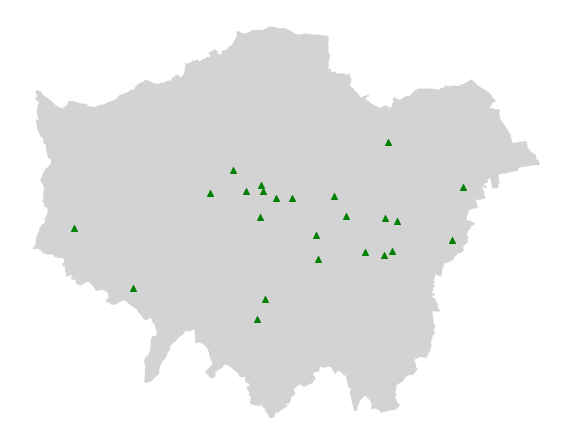

In [23]:
fig,ax=plt.subplots(1,figsize=(10,8))

london_gdf.plot(ax=ax,color='lightgrey')
AQMS_gdf.plot(ax=ax,color='green',marker='^')

ax.axis('off')
plt.show()